In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats as stat
import yfinance as yf #finans verilerini çekmek için

#metin madenciligi
import nltk 
from nltk.corpus import stopwords
from textblob import Word
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#duygu analizi
from textblob import TextBlob

In [2]:
# 2015'ten 2020'ye kadar şirketler hakkında tweet içeren verileri içe aktaralım.

cpy_main = pd.read_csv("Company.csv")
cpy_tweet_main = pd.read_csv("Company_Tweet.csv")
tweet_main = pd.read_csv("Tweet.csv")

In [3]:
# Veri setinin yedeğini aldık.

cpy = cpy_main.copy()
cpy_tweet = cpy_tweet_main.copy()
tweet = tweet_main.copy()

In [4]:
cpy

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [5]:
cpy_tweet

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [6]:
tweet

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [7]:
tweets = pd.merge(tweet,cpy_tweet,on='tweet_id',how='inner') #aynı tabloda birleştirir tweet + cpy_tweet
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA
4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL
4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT


In [8]:
# post_date ve date'i düzenleyelim. date ve post_date olarak ayırdık. 
# post_date: tarih ve tweet atılma saati (saat,dk,sn)
# post: tweet atılma tarihi 

tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')
tweets["date"] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01
...,...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31
4336441,1212160015332728833,Commuternyc,2019-12-31 23:54:03,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,2019-12-31
4336442,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31
4336443,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,2019-12-31


In [9]:
total = tweets["comment_num"] + tweets["retweet_num"] + tweets["like_num"]
tweets["total_engangement"] = total
#tweets.loc[tweets["total_engangement"]]
tweets.sort_values(by=['total_engangement'], ascending=False)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,total_engangement
889147,692169663577485315,ValaAfshar,2016-01-27 02:18:02,Apple has $216 billion in cash. It could buy a...,42,984,677,AAPL,2016-01-27,1703
1453480,770310550991605760,cnntech,2016-08-29 17:22:01,Apple's next iPhone will likely be unveiled Se...,11,729,918,AAPL,2016-08-29,1658
164878,575014851363405824,RANsquawk,2015-03-09 19:26:38,Loving my Apple Watch $AAPL,66,882,654,AAPL,2015-03-09,1602
1789884,816359802733555712,DavidSchawel,2017-01-03 19:05:18,Sometimes hard to wrap your head around $AMZN,14,646,900,AMZN,2017-01-03,1560
2008979,854690001866686464,philstockworld,2017-04-19 13:35:50,"Will We Hold It Wednesday - Nasdaq 5,400 Editi...",0,969,520,AMZN,2017-04-19,1489
...,...,...,...,...,...,...,...,...,...,...
2501742,943824142251495424,icreateinc,2017-12-21 12:43:05,#gossip #sexy #celebrities #nsfw #fashion #hot...,0,0,0,AAPL,2017-12-21,0
2501743,943824144390610945,minookbrainbots,2017-12-21 12:43:06,#gossip #sexy #celebrities #nsfw #fashion #hot...,0,0,0,AAPL,2017-12-21,0
2501744,943824147972575232,huvbee,2017-12-21 12:43:06,#gossip #sexy #celebrities #nsfw #fashion #hot...,0,0,0,AAPL,2017-12-21,0
1162137,728335093605924864,intowin2017,2016-05-05 21:26:32,MSFT SharesSee Here ---> http://dlvr.it/LDxlH7...,0,0,0,MSFT,2016-05-05,0


In [10]:
#veri setinin yapısal bilgilerini görelim
tweets.info() 
#cpy_tweet.info()
#cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   tweet_id           int64         
 1   writer             object        
 2   post_date          datetime64[ns]
 3   body               object        
 4   comment_num        int64         
 5   retweet_num        int64         
 6   like_num           int64         
 7   ticker_symbol      object        
 8   date               datetime64[ns]
 9   total_engangement  int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 363.9+ MB


<AxesSubplot:>

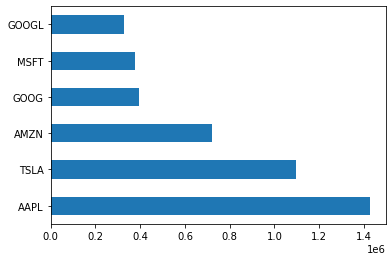

In [11]:
# Her bir şirket adının tweet body sütununda bulunma sayısına bakalım.
## tweets.ticker_symbol.value_counts()
tweets.ticker_symbol.value_counts().plot.barh() #görselleştirelim.

In [12]:
aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
goog = tweets[tweets['ticker_symbol'] == 'GOOG']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL']

In [13]:
#Checking for Null values
tweets.isna().sum()

tweet_id                 0
writer               55919
post_date                0
body                     0
comment_num              0
retweet_num              0
like_num                 0
ticker_symbol            0
date                     0
total_engangement        0
dtype: int64

**Sadece writer sütununda eksik değerler mevcuttur**

In [14]:
#cpy_tweet veri setindeki sadece kategorik olan degiskenleri gozlemleyelim
category_tweet = tweet.select_dtypes(include = "object")
category_tweet

,writer,body
0,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt..."
1,KeralaGuy77,Insanity of today weirdo massive selling. $aap...
2,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...
...,...,...
3717959,TEEELAZER,That $SPY $SPX puuump in the last hour was the...
3717960,ShortingIsFun,In 2020 I may start Tweeting out positive news...
3717961,Commuternyc,Patiently Waiting for the no twitter sitter tw...
3717962,MoriaCrypto,I don't discriminate. I own both $aapl and $ms...


In [15]:
tweets[['post_date','body','ticker_symbol','total_engangement']].sort_values(by=['post_date'], ascending=True)

,post_date,body,ticker_symbol,total_engangement
0,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL,1
1,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,AAPL,0
2,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AMZN,0
3,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,TSLA,1
4,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,1
...,...,...,...,...
4336440,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,TSLA,1
4336441,2019-12-31 23:54:03,Patiently Waiting for the no twitter sitter tw...,TSLA,5
4336443,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,MSFT,2
4336442,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,AAPL,2


In [16]:
tsla_stock = yf.Ticker('TSLA').history(start=min(tsla['date']).date(),end=max(tsla['date']).date())
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn['date']).date(),end=max(amzn['date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl['date']).date(),end=max(googl['date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft['date']).date(),end=max(msft['date']).date())

In [17]:
tsla_stock
#aapl_stock
#amzn_stock
#googl_stock
#msft_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,44.618000,45.136002,44.450001,44.481998,11487500,0,0
2015-01-02,44.574001,44.650002,42.652000,43.862000,23822000,0,0
2015-01-05,42.910000,43.299999,41.431999,42.018002,26842500,0,0
2015-01-06,42.012001,42.840000,40.841999,42.256001,31309500,0,0
2015-01-07,42.669998,42.956001,41.956001,42.189999,14842000,0,0
...,...,...,...,...,...,...,...
2019-12-23,82.356003,84.402000,82.000000,83.844002,66598000,0,0
2019-12-24,83.671997,85.094002,82.538002,85.050003,40273500,0,0
2019-12-26,85.582001,86.695999,85.269997,86.188004,53169500,0,0


# Tweet hacmi ile şirketin hisse işlem hacmi arasındaki ilişkiyi inceleyip görselleştirelim #

>**Tweet miktarının belirli bir şirketin işlem hacmini etkileyip etkilemediğini öğrenmek istiyoruz. Bunun için bir gün önceki tweet hacminin ertesi gün belirli bir şirketin hisse fiyatı üzerindeki etkilerini karşılaştırmamız gerekliydi. Tüm zaman serilerini 1 nokta geri kaydırarak bunu inceleyebilirdik. Bunun için pandas kütüphanesine ait olan shift operatörünü kullandık.**

>**Tweet hacmi ile işlem hacmi arasındaki ilişkiyi incelemek için korelasyon kullandık. Spearman korelasyon testi veri setinin normal dağıldığını varsaymadığı için Pearson korelasyonu yerine Spearman korelasyon istatistik testini kullandık.**

### HİPOTEZ ###

- **sıfır hipotezi (null hypothesis): Tweet hacmi ile işlem gören hisse senedi hacmi arasında bir ilişki (korelasyon) yoktur.**

- **alternatif hipotez (alternate hypothesis): Tweet hacmi ile işlem gören hisse senedi hacmi arasında bir ilişki (korelasyon) vardır.**

> **Spearman korelasyonunun p değeri, önceden belirlediğimiz 0,05 eşiğinin altına düşerse sıfır hipotezini reddedeceğiz ve işlem gören hisse senedi hacmi ile tweet hacmi arasında pozitif/negatif bir korelasyon olduğu sonucuna varmak için yeterli kanıta sahip olacağız.**

> **İstatistik testinin yanı sıra, bu 2 değişken arasındaki ilişkiye genel bir bakış için verileri görselleştirmek için işlem gören hacmi ve tweet hacmini aynı grafikte çizmeye karar verdik. Bu iki değişken arasındaki ilişkinin nasıl olduğuna dair daha net bir görsel elde etmek ve genel eğilim hakkında daha net bir anlayışa sahip olmak için ortalama 30 günlük bir inceleme yeterliydi. Bunun için rolling operatörünü kullanmak durumunda kaldık.**

In [21]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('date').size().shift(-1).dropna() 
    stock_data = stocks['Volume'].dropna()
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,color = 'blue', label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()

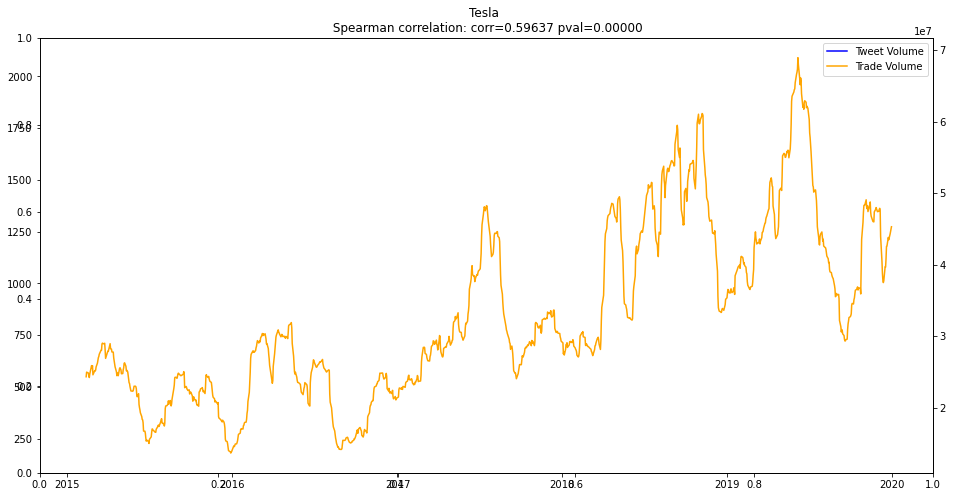

In [20]:
tweet_vol_affect(tsla,tsla_stock,"Tesla")

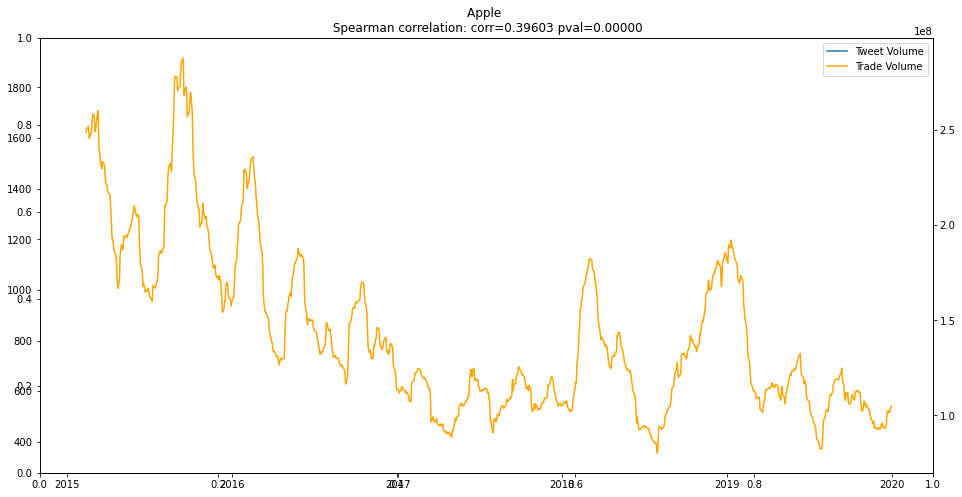

In [20]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

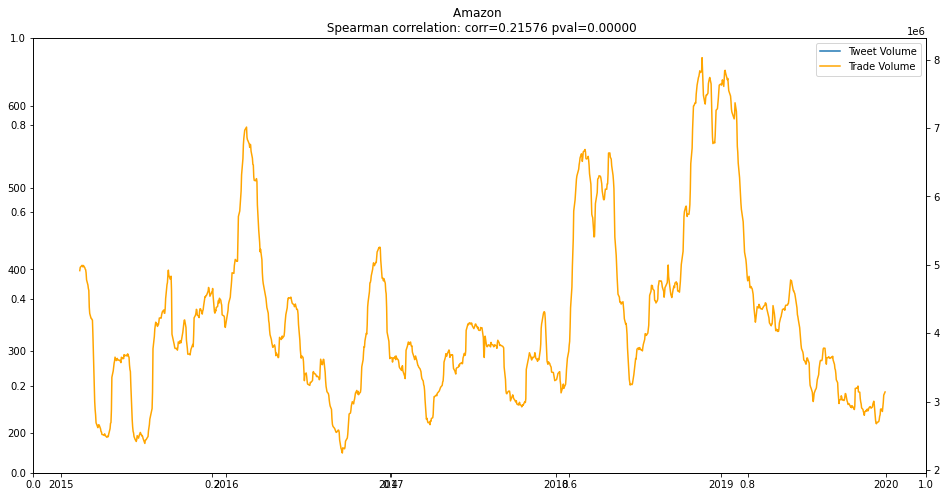

In [21]:
tweet_vol_affect(amzn,amzn_stock,"Amazon")

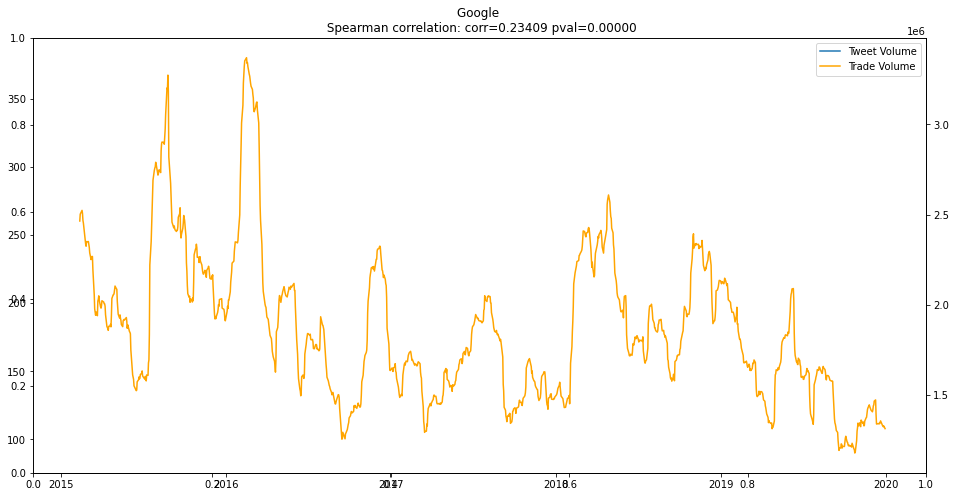

In [22]:
tweet_vol_affect(googl,googl_stock,"Google")

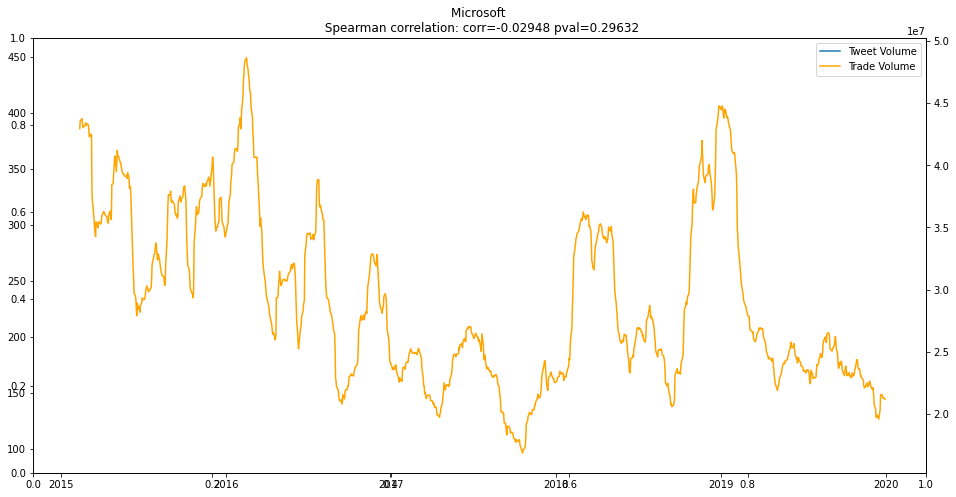

In [23]:
tweet_vol_affect(msft,msft_stock,"Microsoft")

>Grafikler incelendiğinde, tweetlerin hacminin şirketlerin işlem hacimleri ile pozitif bir korelasyona sahip olduğu görülüyor. Bununla birlikte, korelasyonun gücü sorgulanabilir. **Ek olarak, Mircosoft'un p-değerinin önceden belirlenmiş 0,05 eşiğini aştığı durumda da gösterildiği gibi, tweet hacminin borsa hisse fiyatı ile her zaman ilişkili olduğu kesin değildir.**

>**Daha net bir yorum yapabilmek adına işlemlerimize devam edelim**

## METİN MADENCİLİĞİ ##

>**Duygu analizine başlamadan önce veri seti üzerinde esas olarak stopwords, emojilerin kaldırılması ile ilgilenen çeşitli ön işleme adımları gerçekleştirdik. Metin belgesi (body) daha iyi analiz edilebilmesi için küçük harfe dönüştürüldü. Daha sonra, noktalama işaretleri temizlendi ve kaldırıldı, böylece veri setinden gereksiz gürültü azaltıldı. Ardından, URL'lerin amacımız için pek bir önemi olmadığından kaldırdık ve kelimelerden tekrar eden karakterleri de kaldırdık. Sonunda, daha iyi sonuçlar için Stemming (kelimeleri türetilmiş gövdelerine indirgeme) ve Lemmatization (türetilmiş kelimeleri lemma olarak bilinen kök biçimlerine indirgeme) gerçekleştirdik.**

In [24]:
#metin madenciliğini başlatmak için tweets veri setinin body kısmını aldık
sentences = tweets["body"]
sentences

0          lx21 made $10,008  on $AAPL -Check it out! htt...
1          Insanity of today weirdo massive selling. $aap...
2          S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3          $GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4          Swing Trading: Up To 8.91% Return In 14 Days h...
                                 ...                        
4336440    In 2020 I may start Tweeting out positive news...
4336441    Patiently Waiting for the no twitter sitter tw...
4336442    I don't discriminate. I own both $aapl and $ms...
4336443    I don't discriminate. I own both $aapl and $ms...
4336444    $AAPL #patent 10,522,475 Vertical interconnect...
Name: body, Length: 4336445, dtype: object

In [25]:
sentenceSample = sentences [:1000]
sentenceSampleDataFrame = pd.DataFrame(sentenceSample) #ümeyi dfe çevirdik ki işlemler kolaylaşsın
sentenceSampleDf = sentenceSampleDataFrame.copy() 
sentenceSampleDf

,body
0,"lx21 made $10,008 on $AAPL -Check it out! htt..."
1,Insanity of today weirdo massive selling. $aap...
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4,Swing Trading: Up To 8.91% Return In 14 Days h...
...,...
995,Apple’s next big device…a pen? $AAPL #aaplhttp...
996,All out $AAPL 111.09 didn't see a higher gap u...
997,Photos app mysteriously vanishes from http://i...
998,Carmakers take a hint from tablets while waiti...


### Büyük-Küçük harf düzenlemesi

In [26]:
sentenceSampleDf_low = sentenceSampleDf.body.apply(lambda x : " ".join(x.lower() for x in x.split()))
sentenceSampleDf_low = pd.DataFrame(sentenceSampleDf_low)
sentenceSampleDf_low

,body
0,"lx21 made $10,008 on $aapl -check it out! http..."
1,insanity of today weirdo massive selling. $aap...
2,s&p100 #stocks performance $hd $low $sbux $tgt...
3,$gm $tsla: volkswagen pushes 2014 record recal...
4,swing trading: up to 8.91% return in 14 days h...
...,...
995,apple’s next big device…a pen? $aapl #aaplhttp...
996,all out $aapl 111.09 didn't see a higher gap u...
997,photos app mysteriously vanishes from http://i...
998,carmakers take a hint from tablets while waiti...


### Noktalama İşaretlerinin Silinmesi ###

In [27]:
sentenceSample_punc = sentenceSampleDf_low.body.str.replace("[^\w\s]","")
sentenceSample_punc = pd.DataFrame(sentenceSample_punc) 
sentenceSample_punc

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_824/2222513799.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sentenceSample_punc = sentenceSampleDf_low.body.str.replace("[^\w\s]","")


,body
0,lx21 made 10008 on aapl check it out httpprofi...
1,insanity of today weirdo massive selling aapl ...
2,sp100 stocks performance hd low sbux tgt dvn i...
3,gm tsla volkswagen pushes 2014 record recall t...
4,swing trading up to 891 return in 14 days http...
...,...
995,apples next big devicea pen aapl aaplhttpstksc...
996,all out aapl 11109 didnt see a higher gap up i...
997,photos app mysteriously vanishes from httpiclo...
998,carmakers take a hint from tablets while waiti...


### Sayıların Silinmesi ###

In [28]:
sentenceSample_num = sentenceSample_punc.body.str.replace("\d","")
sentenceSample_num = pd.DataFrame(sentenceSample_num)
sentenceSample_num

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_824/3343522415.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sentenceSample_num = sentenceSample_punc.body.str.replace("\d","")


,body
0,lx made on aapl check it out httpprofitlymnds...
1,insanity of today weirdo massive selling aapl ...
2,sp stocks performance hd low sbux tgt dvn ibm ...
3,gm tsla volkswagen pushes record recall tally...
4,swing trading up to return in days httpowlyg...
...,...
995,apples next big devicea pen aapl aaplhttpstksc...
996,all out aapl didnt see a higher gap up in pm ...
997,photos app mysteriously vanishes from httpiclo...
998,carmakers take a hint from tablets while waiti...


### Sık geçen kelimelerin silinmesi ###
>the, a gibi anlamsız kelimeleri siliyoruz
- !pip install nltk

In [29]:
sw = stopwords.words("english") #ingilizce de olan stop wordler
#sw

In [30]:
sentenceSample_sw = sentenceSample_num.body.apply(lambda x: " ".join(x for x in x.split() if x not in sw))
#joinle boslukları birlestiriyoruz. Neyle ? x i bölüyor (x burdaki her kelime) ve eğer x sw word degilse 
#yani bakıyorum sw mi değilse olduğu gibi bırak değilse böl. Sw değilse o x i seç
sentenceSample_sw 

0      lx made aapl check httpprofitlymndsaff learn h...
1      insanity today weirdo massive selling aapl bid...
2      sp stocks performance hd low sbux tgt dvn ibm ...
3      gm tsla volkswagen pushes record recall tally ...
4      swing trading return days httpowlygdks swingtr...
                             ...                        
995    apples next big devicea pen aapl aaplhttpstksc...
996    aapl didnt see higher gap pm look reentry lowe...
997    photos app mysteriously vanishes httpicloudcom...
998    carmakers take hint tablets waiting apples car...
999    carmakers take hint tablets waiting apples car...
Name: body, Length: 1000, dtype: object

### Az geçen kelimelerin silinmesi ###

In [31]:
sentenceSample_sw = pd.DataFrame(sentenceSample_sw, columns = ["body"])
pd.Series(" ".join(sentenceSample_sw.body).split()).value_counts()
#pandas serisinde çeviririz çünkü split işleminden sonra liste formuna döner

aapl                   601
amzn                   255
tsla                   180
goog                   155
fb                     152
                      ... 
fibonacci                1
profitable               1
exits                    1
httpbitlyfibretrace      1
lx                       1
Length: 2727, dtype: int64

In [32]:
#ornegin az gecen son 8 kelimeyi silmek istiyorum
sil = pd.Series(" ".join(sentenceSample_sw.body).split()).value_counts().tail(100)
sil = pd.Series(" ".join(sentenceSample_sw.body).split()).value_counts()[-8:]
sil

eliminate              1
strike                 1
contract               1
fibonacci              1
profitable             1
exits                  1
httpbitlyfibretrace    1
lx                     1
dtype: int64

In [33]:
sentenceSample_sw.body.apply(lambda x: " ".join(x for x in x.split() if x not in sil))

0      made aapl check httpprofitlymndsaff learn howt...
1      insanity today weirdo massive selling aapl bid...
2      sp stocks performance hd low sbux tgt dvn ibm ...
3      gm tsla volkswagen pushes record recall tally ...
4      swing trading return days httpowlygdks swingtr...
                             ...                        
995    apples next big devicea pen aapl aaplhttpstksc...
996    aapl didnt see higher gap pm look reentry lowe...
997    photos app mysteriously vanishes httpicloudcom...
998    carmakers take hint tablets waiting apples car...
999    carmakers take hint tablets waiting apples car...
Name: body, Length: 1000, dtype: object

### Lemmatization ###

- !pip install textblob
- nltk.download("wordnet")


In [34]:
sentenceSample_base = sentenceSample_sw.body.apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()])) 
#working -> work
sentenceSample_base = pd.DataFrame(sentenceSample_base)
sentenceSample_base

,body
0,lx made aapl check httpprofitlymndsaff learn h...
1,insanity today weirdo massive selling aapl bid...
2,sp stock performance hd low sbux tgt dvn ibm a...
3,gm tsla volkswagen push record recall tally hi...
4,swing trading return day httpowlygdks swingtra...
...,...
995,apple next big devicea pen aapl aaplhttpstksco...
996,aapl didnt see higher gap pm look reentry lowe...
997,photo app mysteriously vanishes httpicloudcom ...
998,carmaker take hint tablet waiting apple carpla...


In [35]:
sentenceSample_end = sentenceSample_base.body.str.replace("rt","")
sentenceSample_end = pd.DataFrame(sentenceSample_end)
sentenceSample_end = sentenceSample_end.body.str.replace("\n","")
sentenceSample_end = pd.DataFrame(sentenceSample_end)
sentenceSample_end = sentenceSample_end.body.str.replace("\t","")
sentenceSample_end = pd.DataFrame(sentenceSample_end)
sentenceSample_end

,body
0,lx made aapl check httpprofitlymndsaff learn h...
1,insanity today weirdo massive selling aapl bid...
2,sp stock performance hd low sbux tgt dvn ibm a...
3,gm tsla volkswagen push record recall tally hi...
4,swing trading return day httpowlygdks swingtra...
...,...
995,apple next big devicea pen aapl aaplhttpstksco...
996,aapl didnt see higher gap pm look reentry lowe...
997,photo app mysteriously vanishes httpicloudcom ...
998,carmaker take hint tablet waiting apple carpla...


In [36]:
import re
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove mentions
    text = re.sub(r'#', '', text) #remove hasthag
    text = re.sub(r'RT[\s]+', '', text) 
    text = re.sub(r'http\S+', '', text) #remove http
    text = re.sub('[0-9]+', '', text) #Cleaning and removing Numeric numbers
    
    return text

sentenceSample_end['body'] = sentenceSample_end['body'].apply(cleanTxt)
sentenceSample_end

,body
0,lx made aapl check learn howtotrade exe watt...
1,insanity today weirdo massive selling aapl bid...
2,sp stock performance hd low sbux tgt dvn ibm a...
3,gm tsla volkswagen push record recall tally hi...
4,swing trading return day swingtrading forecas...
...,...
995,apple next big devicea pen aapl aapl
996,aapl didnt see higher gap pm look reentry lowe...
997,photo app mysteriously vanishes tomac aapl
998,carmaker take hint tablet waiting apple carpla...


In [37]:
#body kısmının düzenlenmiş yeni halini veri setine body sütununa koyalım:
tweets["body"] = sentenceSample_end.body
filtered = tweets.head(1000)
filtered

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,total_engangement
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,lx made aapl check learn howtotrade exe watt...,0,0,1,AAPL,2015-01-01,1
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,insanity today weirdo massive selling aapl bid...,0,0,0,AAPL,2015-01-01,0
2,550441732014223360,DozenStocks,2015-01-01 00:01:50,sp stock performance hd low sbux tgt dvn ibm a...,0,0,0,AMZN,2015-01-01,0
3,550442977802207232,ShowDreamCar,2015-01-01 00:06:47,gm tsla volkswagen push record recall tally hi...,0,0,1,TSLA,2015-01-01,1
4,550443807834402816,i_Know_First,2015-01-01 00:10:05,swing trading return day swingtrading forecas...,0,0,1,AAPL,2015-01-01,1
...,...,...,...,...,...,...,...,...,...,...
995,551000140647899139,JPDesloges,2015-01-02 13:00:45,apple next big devicea pen aapl aapl,0,0,0,AAPL,2015-01-02,0
996,551000817810309120,archi_trader,2015-01-02 13:03:26,aapl didnt see higher gap pm look reentry lowe...,0,0,0,AAPL,2015-01-02,0
997,551001067207393280,MacHashNews,2015-01-02 13:04:26,photo app mysteriously vanishes tomac aapl,0,0,0,AAPL,2015-01-02,0
998,551001720957206528,garynielson,2015-01-02 13:07:02,carmaker take hint tablet waiting apple carpla...,1,0,0,AAPL,2015-01-02,1


In [38]:
filtered["body"].value_counts()

swing trading return day  swingtrading forecast techstock mww aapl tsla              14
jeff bezos lost billion amazon worst year since  amzn                                13
 wsj jeff bezos lost billion amazon worst year since  amzn                            8
 amazing subscriber super_trades check profit cha tvix bdr aapl goog fb tsla          8
aapl stock content cha analysis free                                                  8
                                                                                     ..
happy new year safe prosperous new year stock trading investing fb aapl twtr peep     1
twtr anyone else see bought goog yhoo read analysis                                   1
financial expe revealed could bring aa aapl ae  happynewyear                          1
aapl news financial expe revealed could bring aa  board view                          1
goog really like seeing goog google inc                                               1
Name: body, Length: 709, dtype: 

In [39]:
#birebir aynı olan tweetleri sildik
filtered_v2 = filtered.drop_duplicates(subset = "body")
filtered = filtered_v2[['date','body','total_engangement','ticker_symbol']]
filtered

,date,body,total_engangement,ticker_symbol
0,2015-01-01,lx made aapl check learn howtotrade exe watt...,1,AAPL
1,2015-01-01,insanity today weirdo massive selling aapl bid...,0,AAPL
2,2015-01-01,sp stock performance hd low sbux tgt dvn ibm a...,0,AMZN
3,2015-01-01,gm tsla volkswagen push record recall tally hi...,1,TSLA
4,2015-01-01,swing trading return day swingtrading forecas...,1,AAPL
...,...,...,...,...
994,2015-01-02,microsoft band unit replenish jan microsoft st...,1,MSFT
995,2015-01-02,apple next big devicea pen aapl aapl,0,AAPL
996,2015-01-02,aapl didnt see higher gap pm look reentry lowe...,0,AAPL
997,2015-01-02,photo app mysteriously vanishes tomac aapl,0,AAPL


In [40]:
filtered["body"].value_counts()

lx made aapl check  learn howtotrade  exe watt imrs cach gmo                             1
apple increase io mac developer program pricing eu country  tomac aapl                   1
new aapl designed retina disintegrating unis worn duck today ht jasonbwhitman            1
represents company  wsj tech co like aapl twtr fb rank diversity                         1
 wsj see tech comp like apple twitter facebook rank term diversity  aapl fb              1
                                                                                        ..
goog best stock sell today share thought                                                 1
rsh aapl apple buy radioshack sta pushing entire line product review                     1
philosophy using option spread  nflx pcln tsla                                           1
aapl tsla gild celg baba scty rig wfm ba happy new year bull bear read idea              1
carmaker take hint tablet waiting apple carplay google android auto aapl goog mobile     1

>**Ön İşleme süreci tamamlandı**

In [41]:
#hangi kelimenin kaç tane geçtiğini inceleyelim:
freq_Sample = sentenceSample_end["body"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()
freq_Sample.columns = ["kelimeler", "frekanslar"]
#freq_Sample.shape
freq_Sample[freq_Sample.frekanslar > freq_Sample.frekanslar.mean() + freq_Sample.frekanslar.std()]

,kelimeler,frekanslar
0,,859.0
3,aapl,604.0
22,trading,48.0
24,stock,190.0
34,amzn,255.0
35,ibm,42.0
42,tsla,180.0
61,msft,131.0
62,top,54.0
68,apple,148.0


<AxesSubplot:xlabel='kelimeler'>

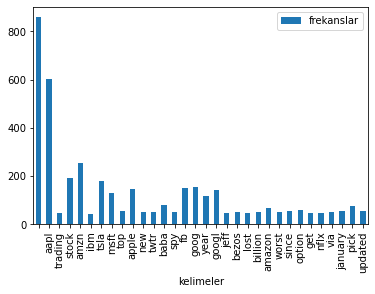

In [42]:
#daha net görmek adına görsel olarak inceleyelim.
a = freq_Sample[freq_Sample.frekanslar > freq_Sample.frekanslar.mean() + freq_Sample.frekanslar.std() + 10.0] #500 eklemeseydim çok karışık oluyordu grafik
a.plot.bar(x = "kelimeler", y = "frekanslar")

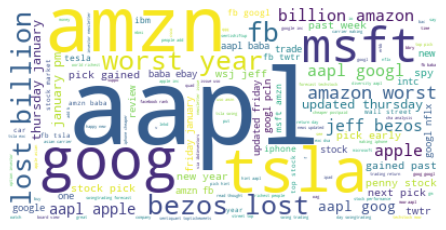

In [43]:
body = " ".join(i for i in sentenceSample_end.body)
wordcloud = WordCloud(background_color = "white").generate(body)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



# DUYGU ANALİZİ #

In [44]:
#duygu analizi
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [45]:
def getSentimentScore(body):
    assert body is not None
    vs = analyzer.polarity_scores(body)
    score = vs['compound']
    
    return score

In [46]:
def getSentiment(body):
    
    assert body is not None
    vs = analyzer.polarity_scores(body)
    score = vs['compound']
    
    if (score >= 0.05): 
        return "Pozitif"
    
    elif (score < 0.05 and score > -0.05):
        return "Nötr"
    
    elif (score <= -0.05):    
        return "Negatif"
    
    print(score)

In [47]:
filtered["Sentiment_score"] = filtered['body'].apply(lambda y: getSentimentScore(y))
filtered['Sentiment'] = filtered['body'].apply(lambda x: getSentiment(x))
filtered

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_824/769533430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Sentiment_score"] = filtered['body'].apply(lambda y: getSentimentScore(y))
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_824/769533430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Sentiment'] = filtered['body'].apply(lambda x: getSentiment(x))


,date,body,total_engangement,ticker_symbol,Sentiment_score,Sentiment
0,2015-01-01,lx made aapl check learn howtotrade exe watt...,1,AAPL,0.0000,Nötr
1,2015-01-01,insanity today weirdo massive selling aapl bid...,0,AAPL,-0.8271,Negatif
2,2015-01-01,sp stock performance hd low sbux tgt dvn ibm a...,0,AMZN,-0.2732,Negatif
3,2015-01-01,gm tsla volkswagen push record recall tally hi...,1,TSLA,0.0000,Nötr
4,2015-01-01,swing trading return day swingtrading forecas...,1,AAPL,0.0000,Nötr
...,...,...,...,...,...,...
994,2015-01-02,microsoft band unit replenish jan microsoft st...,1,MSFT,0.0000,Nötr
995,2015-01-02,apple next big devicea pen aapl aapl,0,AAPL,0.0000,Nötr
996,2015-01-02,aapl didnt see higher gap pm look reentry lowe...,0,AAPL,-0.2960,Negatif
997,2015-01-02,photo app mysteriously vanishes tomac aapl,0,AAPL,0.0000,Nötr


In [48]:
filtered["Sentiment"].value_counts()

Nötr       315
Pozitif    257
Negatif    137
Name: Sentiment, dtype: int64

In [49]:
N = filtered["Sentiment"].value_counts()[0]
P = filtered["Sentiment"].value_counts()[1]
Neg = filtered["Sentiment"].value_counts()[2]

Nötr = (N/(N+P+Neg))*100
Nötr = round(Nötr,2)
Pozitif = (P/(N+P+Neg))*100
Pozitif = round(Pozitif,2)
Negatif = (Neg/(N+P+Neg))*100
Negatif = round(Negatif,2)

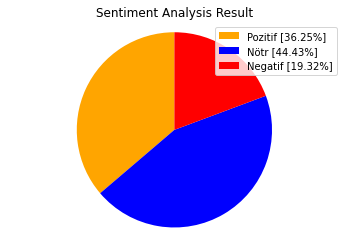

In [50]:
labels = ['Pozitif ['+str(Pozitif)+'%]' , 'Nötr ['+str(Nötr)+'%]','Negatif ['+str(Negatif)+'%]']
sizes = [Pozitif, Nötr, Negatif]
colors = ['orange','blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis('equal')
plt.show()

In [51]:
filtered = filtered.loc[filtered["Sentiment"] != "Nötr"]
filtered

,date,body,total_engangement,ticker_symbol,Sentiment_score,Sentiment
1,2015-01-01,insanity today weirdo massive selling aapl bid...,0,AAPL,-0.8271,Negatif
2,2015-01-01,sp stock performance hd low sbux tgt dvn ibm a...,0,AMZN,-0.2732,Negatif
18,2015-01-01,unp orcl qcom msft aapl top scoring mega cap r...,0,AAPL,0.2023,Pozitif
23,2015-01-01,cnbc top trade fastmoney tif aapl tgt twtr bid...,2,AAPL,0.2023,Pozitif
24,2015-01-01,searched hundred cha found perfectly capture ...,0,AAPL,0.6369,Pozitif
...,...,...,...,...,...,...
976,2015-01-02,top stock lookup ysty aapl bac baba fb ge mog...,1,AAPL,0.2023,Pozitif
978,2015-01-02,aapl actively trading never thought stock woul...,0,AAPL,0.4404,Pozitif
980,2015-01-02,benzinga expe explain u fed raise rate sta d...,4,AAPL,0.1139,Pozitif
983,2015-01-02,amazon move aggressively toward creation digit...,1,AMZN,0.1280,Pozitif


### Şirket hisseleri ile tweet hacmi arasındaki ilişkiyi yorumlamak için yeni bir veri seti yüklüyoruz: şirket hisse değerlerini içeren veri seti

In [52]:
prices = pd.read_csv("CompanyValues.csv")

prices['day_date'] = pd.to_datetime(prices["day_date"]).dt.strftime('%d-%m-%Y') # changing format
prices['day_date'] = pd.to_datetime(prices["day_date"])# assigning datetime data type
prices.head() #veri setinin bir kısmını görelim

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [53]:
def getGraph(stock , date , daysBefore, daysAfter ):
    
    import datetime
    
    date = pd.to_datetime(date)
    
    start1 = date - datetime.timedelta(days=daysBefore)
    end1 = date + datetime.timedelta(days=daysAfter)
    
    temp = prices
    
    temp = temp.loc[prices["ticker_symbol"]  == stock]
    temp = temp.loc[temp["day_date"] > start1]
    temp = temp.loc[temp["day_date"] < end1]
    
    from matplotlib.pyplot import figure
    import matplotlib.pyplot as plt

    figure(figsize=(16, 10))
    #sns.set_style("tik")
    
    plt.xlabel("Tarih" , fontsize = 18)
    plt.ylabel(f"{stock} Fiyatı" , fontsize = 18)
    sns.lineplot(data = temp,
        x = 'day_date',
        y = 'open_value',
        color = 'blue' ,)

    sns.lineplot(data = temp,
        x = 'day_date',
        y = 'close_value', 
        color = 'red')
    
    plt.axvline(x=date , color = '#42E3BB')
    plt.legend(labels=["Açılış Günü", "Kapanış Günü", "İlan Tarihi" ],fontsize = 16)

In [54]:
filtered[['date','ticker_symbol','Sentiment',]]

,date,ticker_symbol,Sentiment
1,2015-01-01,AAPL,Negatif
2,2015-01-01,AMZN,Negatif
18,2015-01-01,AAPL,Pozitif
23,2015-01-01,AAPL,Pozitif
24,2015-01-01,AAPL,Pozitif
...,...,...,...
976,2015-01-02,AAPL,Pozitif
978,2015-01-02,AAPL,Pozitif
980,2015-01-02,AAPL,Pozitif
983,2015-01-02,AMZN,Pozitif


## SEÇTİĞİMİZ 10 TARİHİ (EN POPÜLER 10 TWEET'İ) İNCELEYELİM. ##

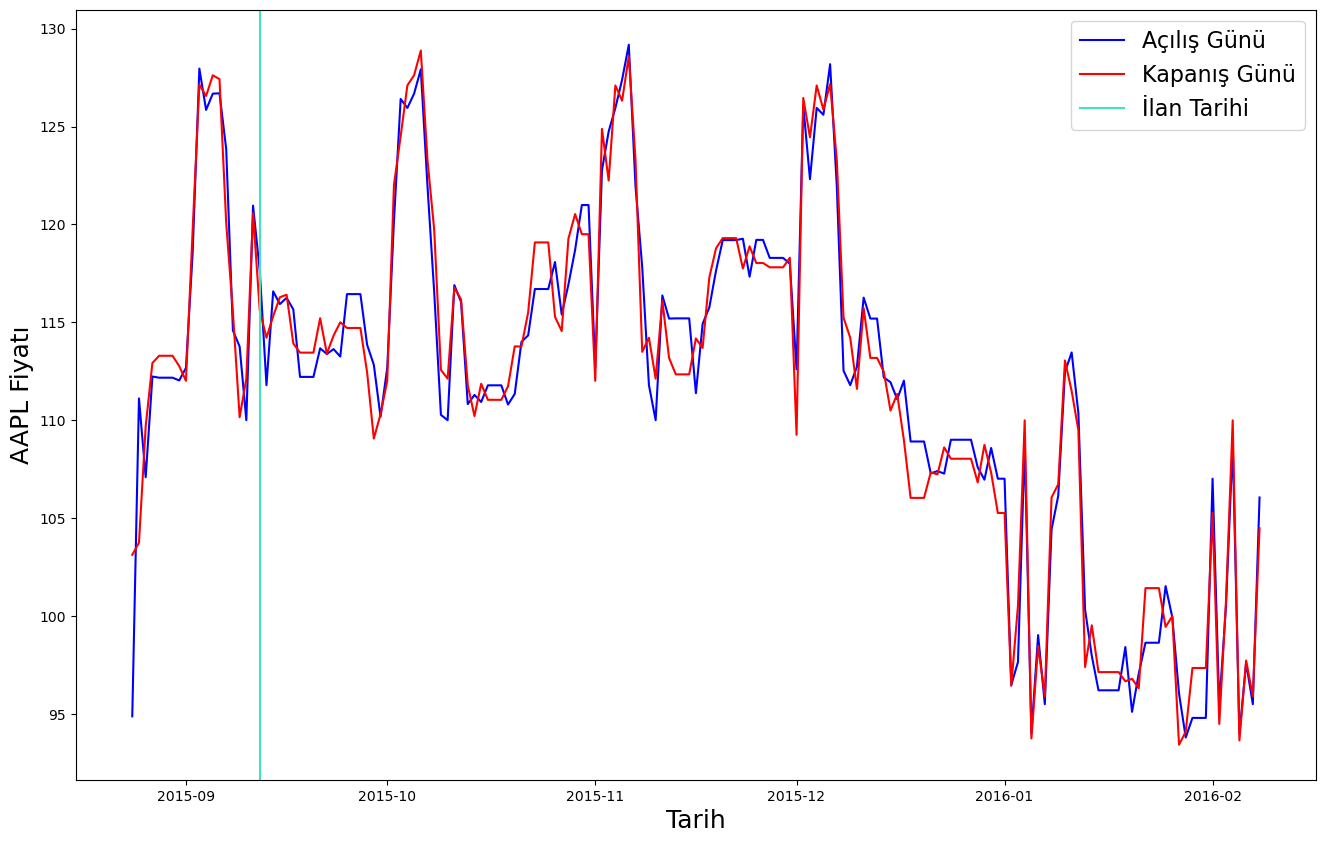

In [55]:
getGraph('AAPL' , '9-12-2015' , 20,  150)

1. **AAPL Fiyatına göre tarihe bakıldığında, fiyat değişmeden kalıyor ve herhangi bir pozitif artış yok gibi görünüyor.**

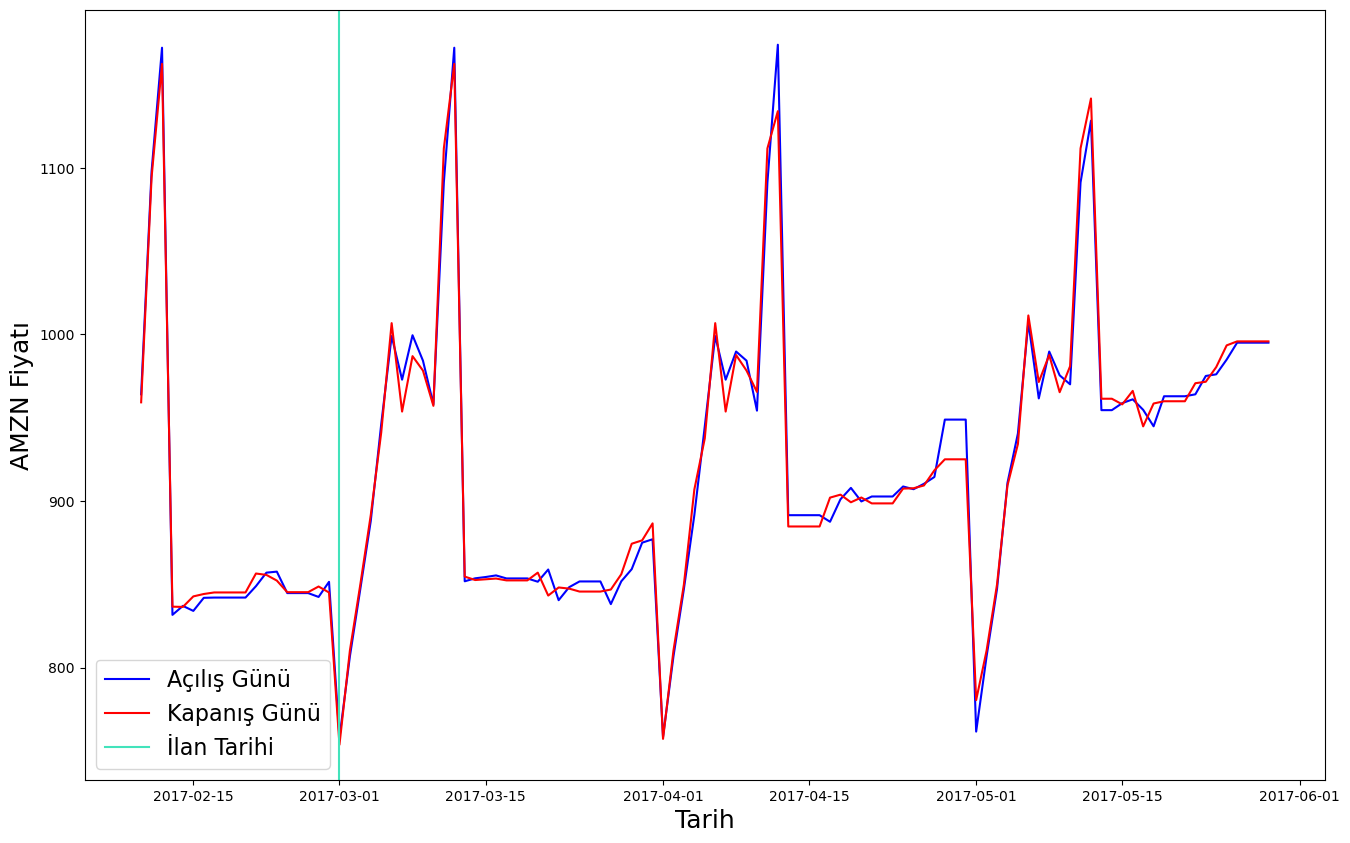

In [56]:
getGraph('AMZN' , '03-01-2017' , 20, 90 )

1. **AMZN Fiyatına göre tarihe bakıldığında, fiyat yine değişmeden kalıyor ve olumsuz bir düşüş yok gibi görünüyor.**

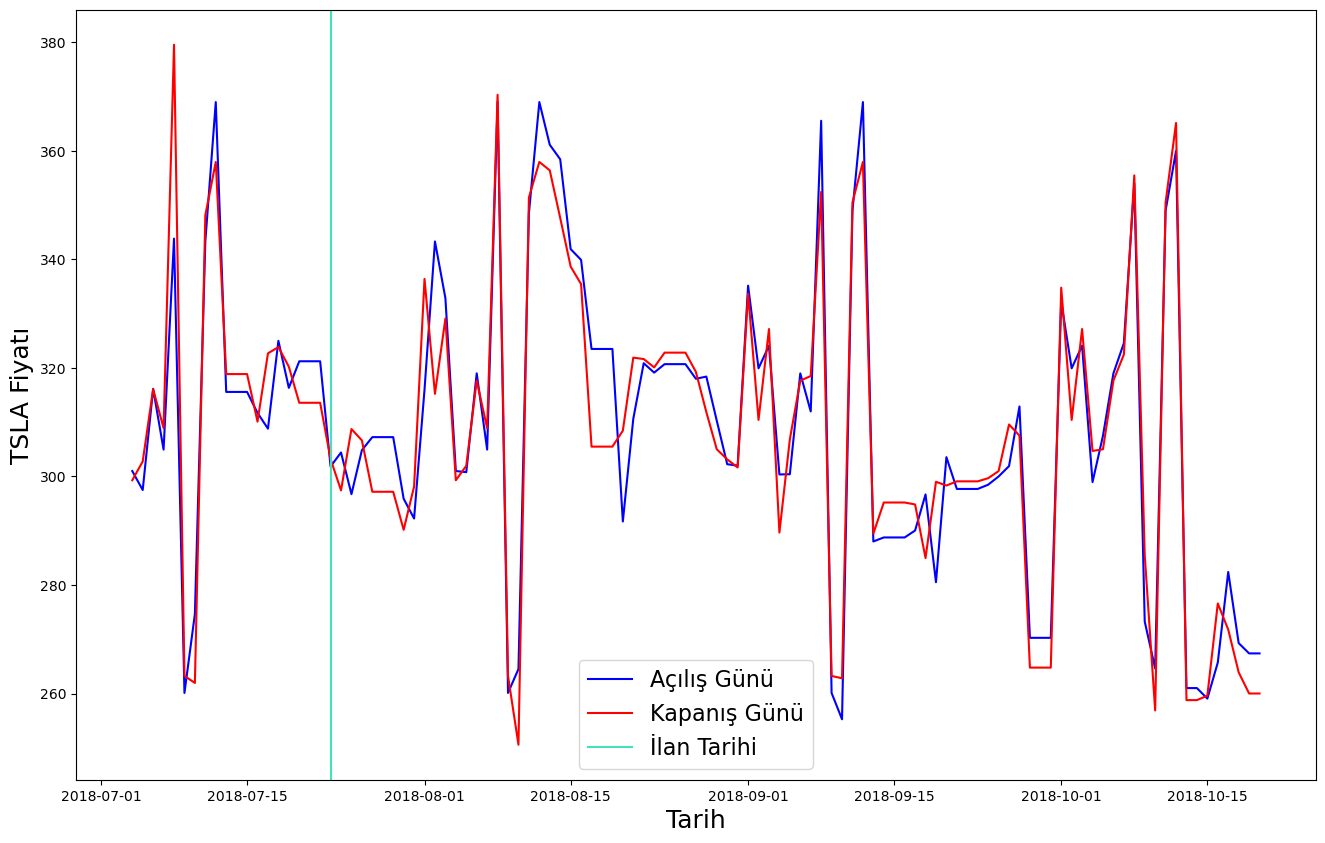

In [57]:
getGraph('TSLA' , '23-07-2018' , 20, 90)

1. **Burada olumsuz düşünce etkili olmuş gibi görünüyor ve fiyat kalıptan biraz koparak düşmüş gibi görünüyor.**

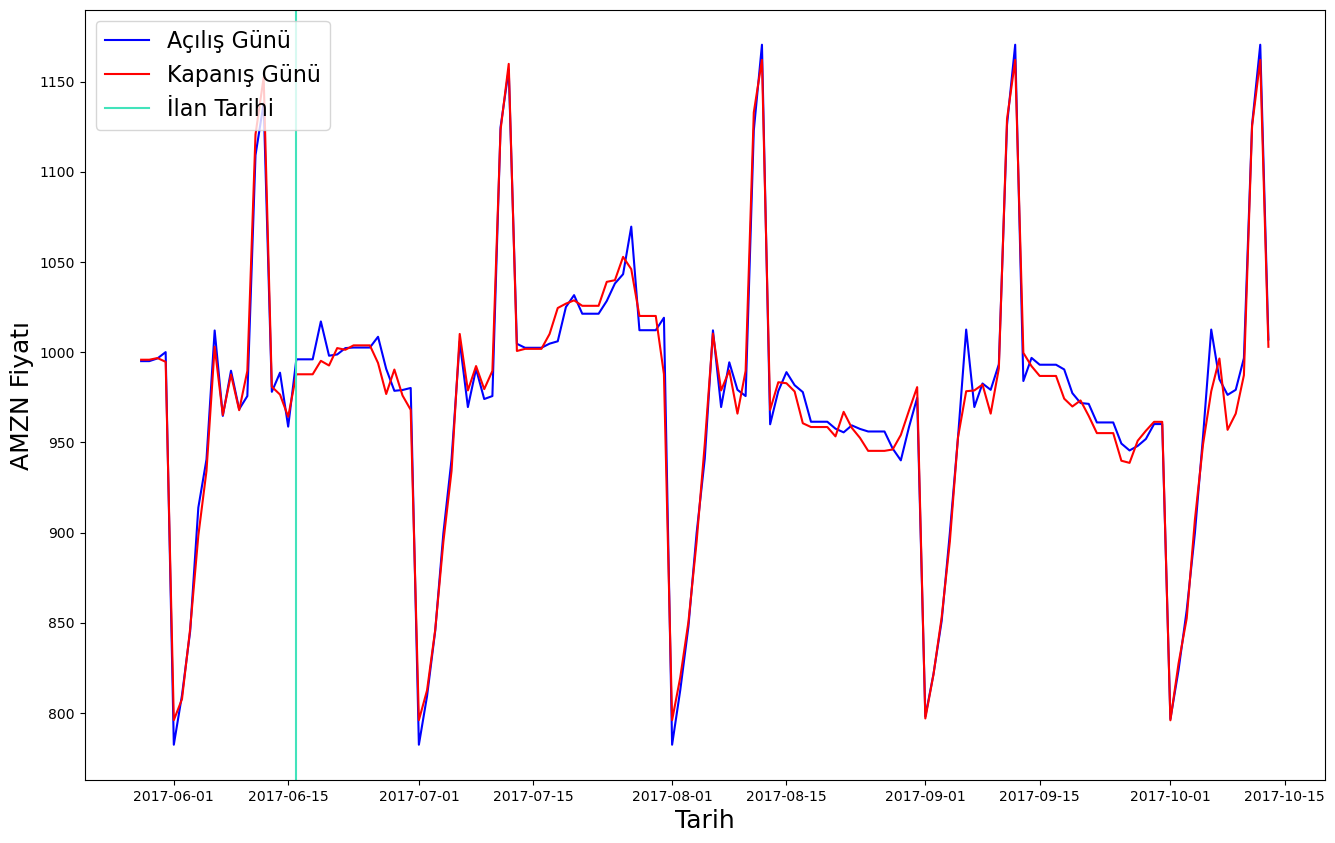

In [58]:
getGraph('AMZN', '16-06-2017' , 20, 120)

1. **Burada tweetlerin hiçbir etkisi yok gibi görünüyor ve fiyatta olumsuz bir düşüş yok**

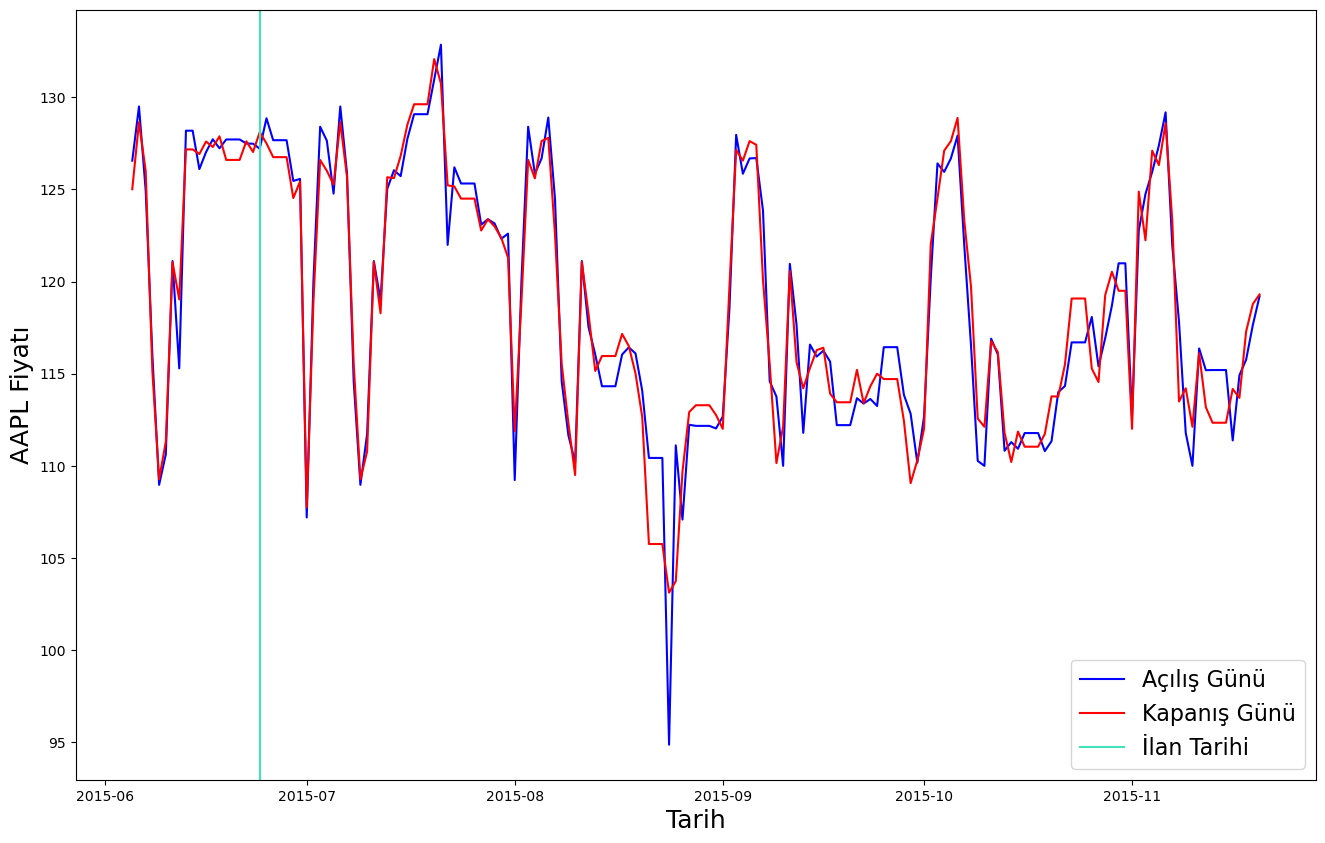

In [59]:
getGraph('AAPL', '24-06-2015' , 20, 150 )

>**Burada da fiyatta olumlu bir artış yok gibi görünüyor.**

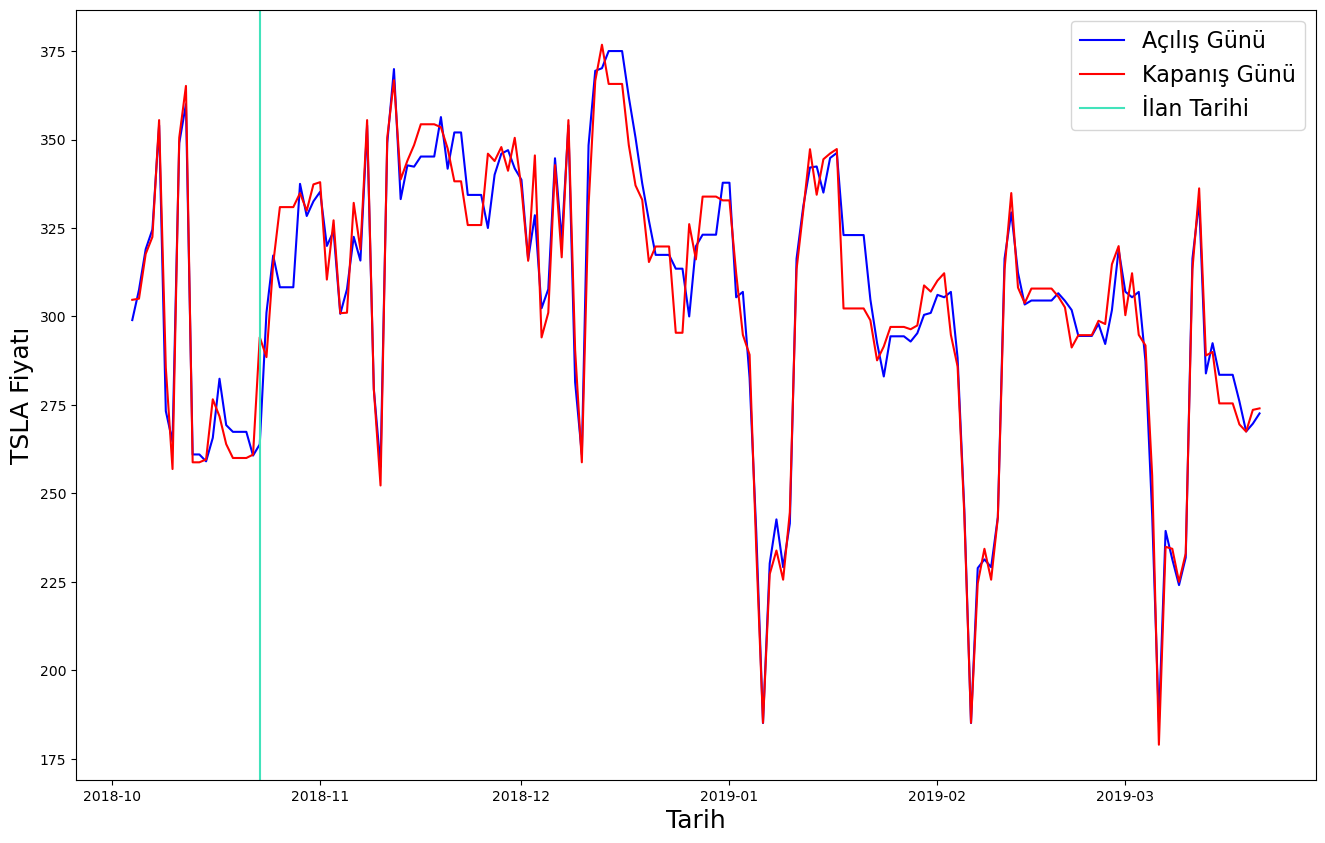

In [60]:
getGraph('TSLA' ,'23-10-2018' , 20, 150 )

> **Yine tweet atıldıktan sonra fiyatta olumsuz bir düşüş görmüyoruz.**

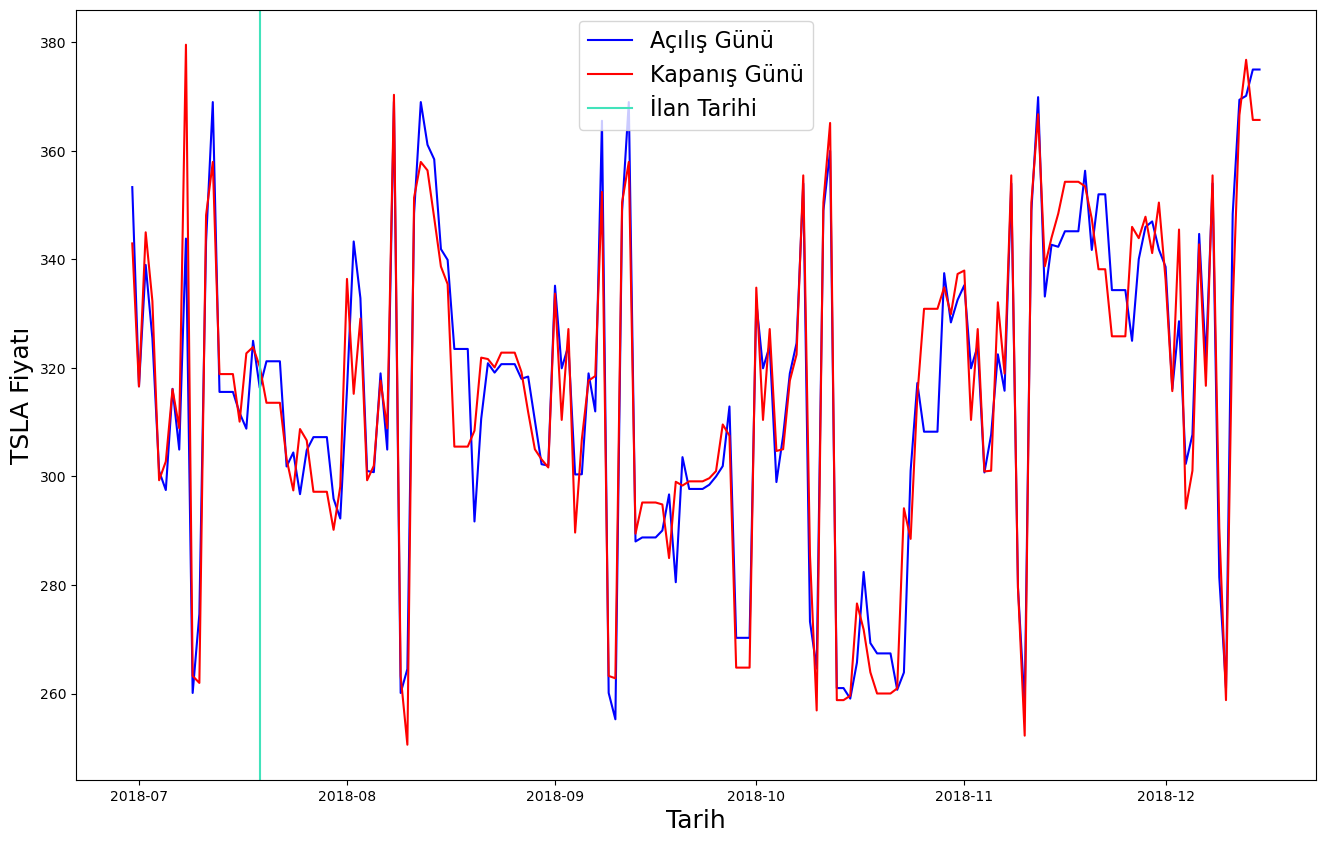

In [61]:
getGraph('TSLA' , '19-07-2018' , 20, 150 )

> **Tweet atıldıktan sonra fiyatta hafif bir düşüş olduğu görülüyor.**

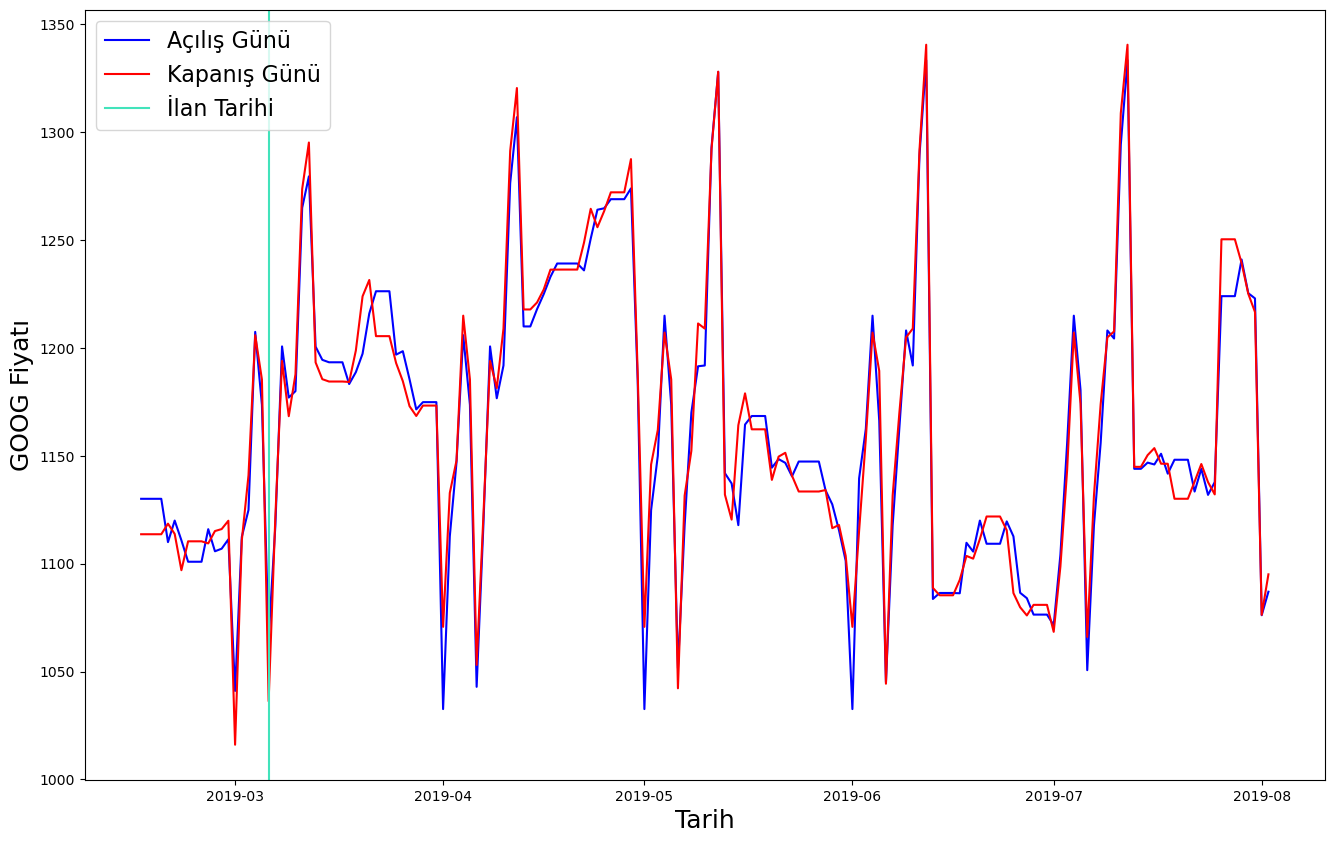

In [62]:
getGraph('GOOG' ,'03-06-2019' , 20, 150 )

> **Burada tweetler, fiyat düşüşü sırasında atılmış gibi görünüyor ve tweetler atıldıktan sonra fiyatı düşürmede herhangi bir etkisi yok.**

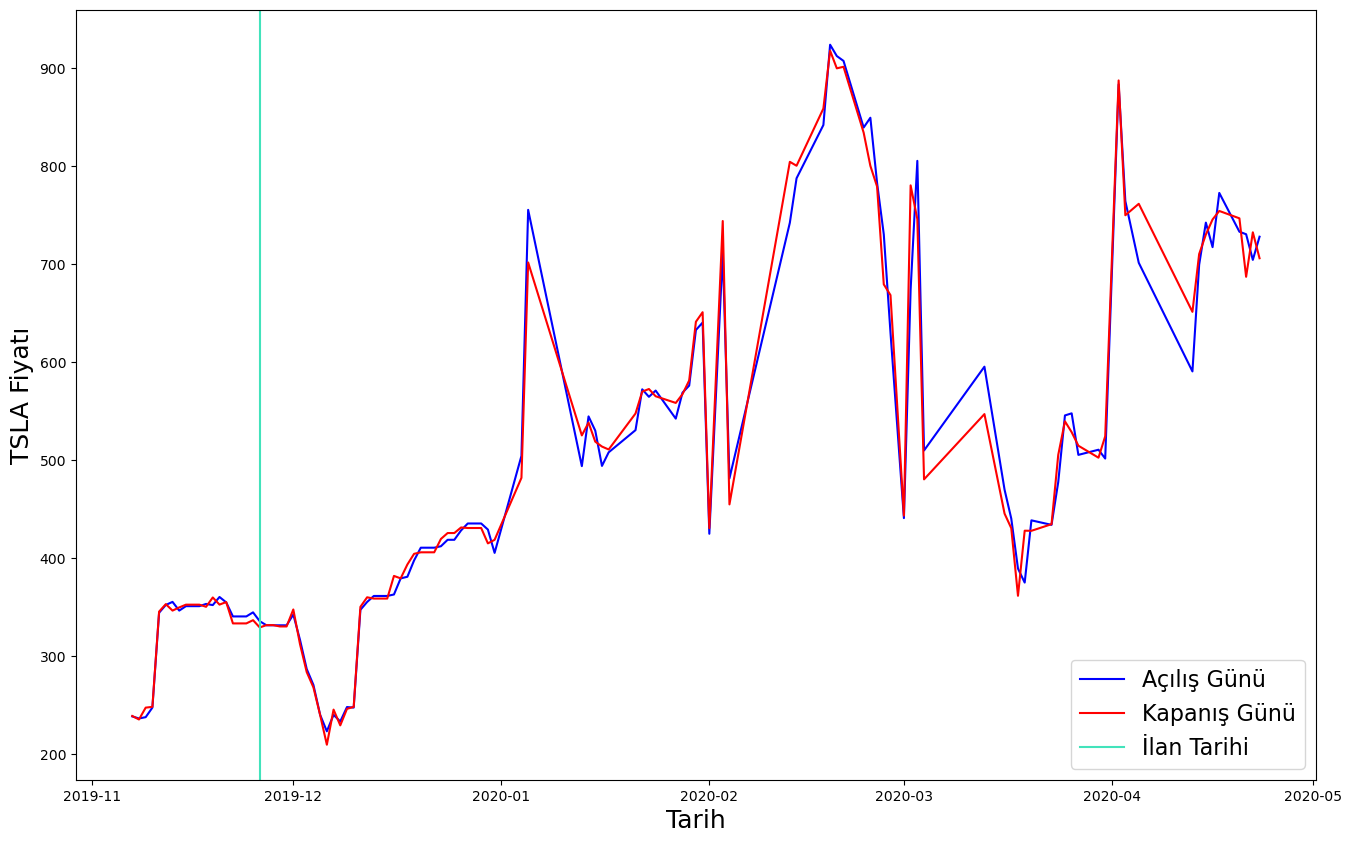

In [63]:
getGraph('TSLA' ,'26-11-2019' , 20, 150 )

> **Tweet, sadece birkaç ay sonra fiyat önemli miktarda arttığı için oldukça önemli bir etkiye sahip görünüyor.**

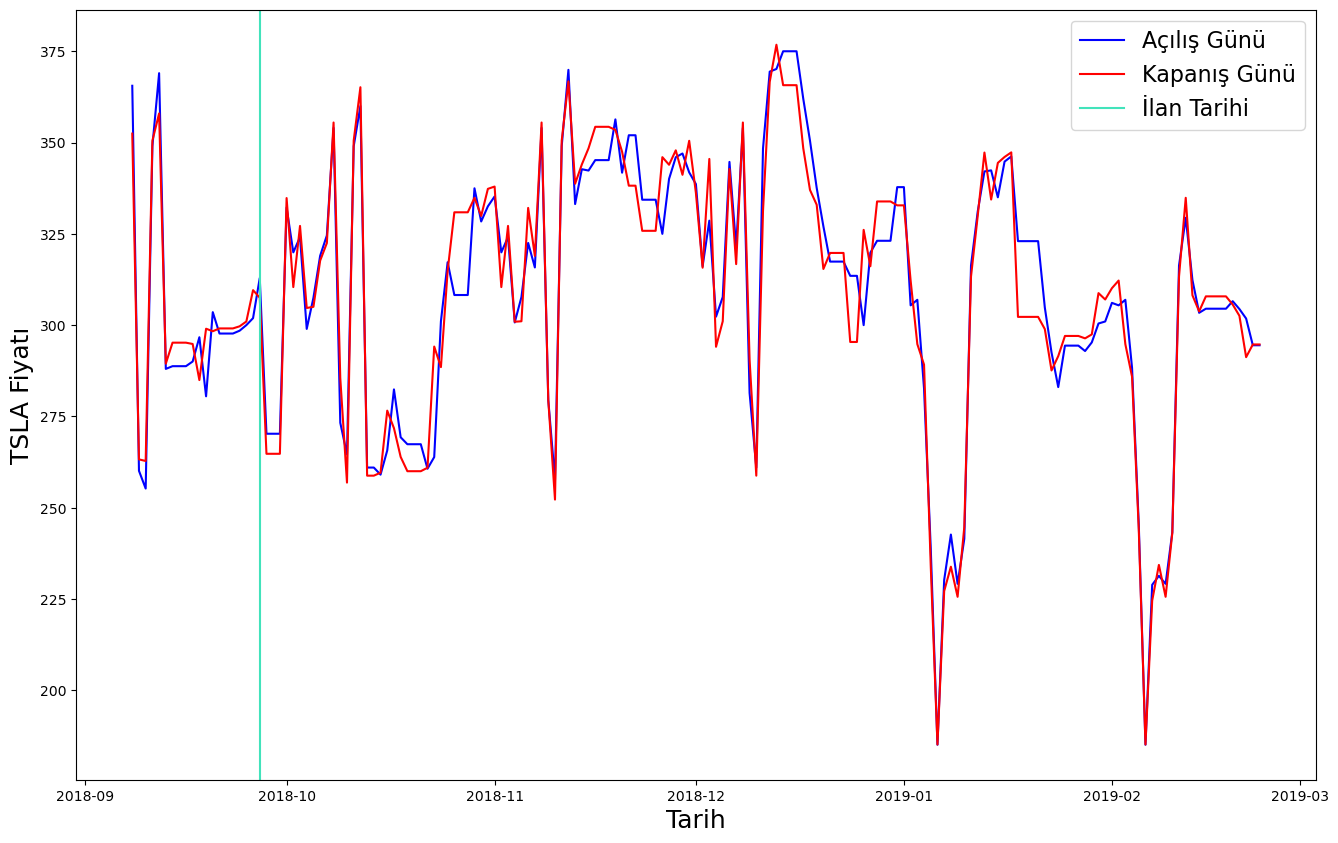

In [64]:
getGraph('TSLA', '27-09-2018' , 20, 150 )

In [1]:
getGraph('APPL', '2016-01-27' , 20, 150 )

NameError: name 'getGraph' is not defined

> **Bu tweetlerin de etkisi var gibi görünüyor çünkü tweetler atıldıktan hemen sonra fiyat düşüyor, ayrıca genel fiyat ve trend de düşüyor.**

# SONUÇ (ÇIKARIMLAR)#

> **İncelediğimiz, atılmış olan en popüler 10 tweet'ten sadece 4'ünün borsa üzerinde etkisi olduğu görülmektedir. (%40)**

> **Sonuç olarak, atılan tweetlerin, twitter'ın, borsa üzerinde bir etkisi var ancak tweet'inizin viral olması durumunda hisse senedi fiyatlarını yükseltmesi veya düşürmesinin herhangi bir kesinliği, garantisi yoktur.**